In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Analysis Findings

### Overall Survival Rate
* Overall survival rate was 38%

### Sex
* Around two-thirds of passengers were male and one-third female
* Female had a survival rate of 74% while for males it was less than 20%

### Embarked
* Embarked shows the port of embarkation, there are three options:
 1. Southampton (S)
 2. Cherbourg (C)
 3. Queenstown (Q)
* The vast majority (72%) were set to embark in Southampton
* Survival rates are similar for Southampton and Queenstown (34% and 39%) but higher for Cherbourg (55%)

### Class
* Pclass shows the class of ticket purchased, there are three options First, Second or Third class
* 55% of passengers where Third class, 21% Second and 24% First
* Survival rate improves as class decreases 24% for Third class, 47% for Second class and 63% for First

### Age

* Age banded into ten-year groups
* The majotiy of passengers lie in the 20-30 age band
* Children were the most likely to survive

| Age Band | Count | Proportion | Survival Rate
| :-:   | -:  | -:  | -: |
| < 10  | 64  | 9%  | 59%
| 10-20 | 115 | 16% | 38%
| 20-30 | 230 | 32% | 37%
| 30-40 | 155 | 22% | 45%
| 40-50 | 86  | 12% | 38%
| 50-60 | 42  | 6%  | 40%
| 60+   | 22  | 3%  | 23%

### Sibling / Spouse

* SibSp contains a count of the number of siblings/spouse aboard
* The vast majority have either zero (68%) or one (23%)
* For analysis band to 0, 1 or 2+
* Those with one sibling / spouse have a greater chance of survival

| Number of Siblings / Spouse | Count | Proportion | Survival Rate
| :-:   | -:  | -:  | -: |
| 0  | 608 | 68% | 35%
| 1  | 209 | 23% | 54%
| 2+ | 74  | 8%  | 27%



In [5]:
TitanicData = pd.read_csv("../input/titanic/train.csv")
TitanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
#Analysis of Survived field

print("The overall proportion that survived was: %.2f" % TitanicData['Survived'].mean()) 

The overall proportion that survived was: 0.38


In [61]:
#Analysis of Sex field

GenderFrequency = pd.crosstab(index=TitanicData['Sex'], columns='count').rename(columns={"count": "#"})
GenderProportion = pd.crosstab(index=TitanicData['Sex'], columns='count', normalize='all').rename(
    columns={"count": "%"})

pd.merge(GenderFrequency, GenderProportion, how='left', left_on='Sex', right_on='Sex')

col_0,#,%
Sex,,
female,314,0.35
male,577,0.65


In [53]:
#Survival Rate by Sex

pd.crosstab(index=TitanicData['Sex'], columns=TitanicData['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.26,0.74
male,0.81,0.19


In [59]:
#Analysis of Embarked field

EmbarkedFrequency = pd.crosstab(index=TitanicData['Embarked'], columns='count').rename(columns={"count": "#"})
EmbarkedProportion = pd.crosstab(index=TitanicData['Embarked'], columns='count', normalize='all').rename(
    columns={"count": "%"})

pd.merge(EmbarkedFrequency, EmbarkedProportion, how='left', left_on='Embarked', right_on='Embarked')

col_0,#,%
Embarked,,
C,168,0.19
Q,77,0.09
S,644,0.72


In [63]:
#Survival Rate by Embarkation

pd.crosstab(index=TitanicData['Embarked'], columns=TitanicData['Survived'], normalize='index')

Survived,0,1
Embarked,,
C,0.45,0.55
Q,0.61,0.39
S,0.66,0.34


In [76]:
#Analysis of Pclass field

ClassFrequency = pd.crosstab(index=TitanicData['Pclass'], columns='count').rename(columns={"count": "#"})
ClassProportion = pd.crosstab(index=TitanicData['Pclass'], columns='count', normalize='all').rename(
    columns={"count": "%"})

pd.merge(ClassFrequency, ClassProportion, how='left', left_on='Pclass', right_on='Pclass')

col_0,#,%
Pclass,,
1,216,0.24
2,184,0.21
3,491,0.55


In [66]:
#Survival Rate by Embarkation

pd.crosstab(index=TitanicData['Pclass'], columns=TitanicData['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.37,0.63
2,0.53,0.47
3,0.76,0.24


col_0,#,%
AgeRange,,
<10,64,0.09
10-20,115,0.16
20-30,230,0.32
30-40,155,0.22
40-50,86,0.12
50-60,42,0.06
60+,22,0.03


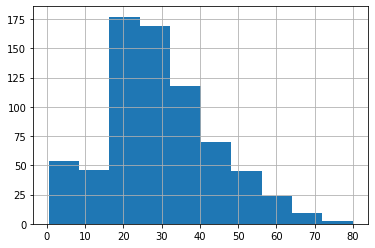

In [92]:
#Analysis of Age field

TitanicData.Age.hist()

bins = [-np.inf,10,20,30,40,50,60,np.inf]
names = ['<10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

TitanicData['AgeRange'] = pd.cut(TitanicData['Age'], bins, labels=names)

ClassFrequency = pd.crosstab(index=TitanicData['AgeRange'], columns='count').rename(columns={"count": "#"})
ClassProportion = pd.crosstab(index=TitanicData['AgeRange'], columns='count', normalize='all').rename(
    columns={"count": "%"})

pd.merge(ClassFrequency, ClassProportion, how='left', left_on='AgeRange', right_on='AgeRange')

In [78]:
#Survival Rate by Embarkation

pd.crosstab(index=TitanicData['AgeRange'], columns=TitanicData['Survived'], normalize='index')

Survived,0,1
AgeRange,,
<10,0.41,0.59
10-20,0.62,0.38
20-30,0.63,0.37
30-40,0.55,0.45
40-50,0.62,0.38
50-60,0.60,0.40
60+,0.77,0.23


col_0,#,%
SibSp,,
0,608,0.68
1,209,0.23
2,28,0.03
3,16,0.02
4,18,0.02
5,5,0.01
8,7,0.01


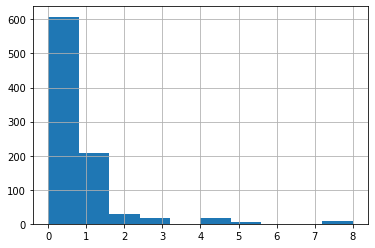

In [81]:
#Analysis of Sibling / Spouse field

TitanicData.SibSp.hist()

ClassFrequency = pd.crosstab(index=TitanicData['SibSp'], columns='count').rename(columns={"count": "#"})
ClassProportion = pd.crosstab(index=TitanicData['SibSp'], columns='count', normalize='all').rename(
    columns={"count": "%"})

pd.merge(ClassFrequency, ClassProportion, how='left', left_on='SibSp', right_on='SibSp')

In [89]:
#Band Sibling / Spouse Count

bins = [-np.inf,0,1,np.inf]
names = ['0','1', '2+']

TitanicData['SibRange'] = pd.cut(TitanicData['SibSp'], bins, labels=names)

ClassFrequency = pd.crosstab(index=TitanicData['SibRange'], columns='count').rename(columns={"count": "#"})
ClassProportion = pd.crosstab(index=TitanicData['SibRange'], columns='count', normalize='all').rename(
    columns={"count": "%"})

pd.merge(ClassFrequency, ClassProportion, how='left', left_on='SibRange', right_on='SibRange')

col_0,#,%
SibRange,,
0,608,0.68
1,209,0.23
2+,74,0.08


In [90]:
#Survival Rate by Number of Siblings / Spouse

pd.crosstab(index=TitanicData['SibRange'], columns=TitanicData['Survived'], normalize='index')

Survived,0,1
SibRange,,
0,0.65,0.35
1,0.46,0.54
2+,0.73,0.27
